In [1]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

pd.set_option('display.max_columns', None)

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()
schema.head()
df.columns

df.count()


Respondent        88883
MainBranch        88331
Hobbyist          88883
OpenSourcer       88883
OpenSource        86842
Employment        87181
Country           88751
Student           87014
EdLevel           86390
UndergradMajor    75614
EduOther          84260
OrgSize           71791
DevType           81335
YearsCode         87938
Age1stCode        87634
YearsCodePro      74331
CareerSat         72847
JobSat            70988
MgrIdiot          61159
MgrMoney          61157
MgrWant           61232
JobSeek           80555
LastHireDate      79854
LastInt           67155
FizzBuzz          71344
JobFactors        79371
ResumeUpdate      77877
CurrencySymbol    71392
CurrencyDesc      71392
CompTotal         55945
                  ...  
Containers        85366
BlockchainOrg     48175
BlockchainIs      60165
BetterLife        86269
ITperson          87141
OffOn             86663
SocialMedia       84437
Extraversion      87305
ScreenName        80486
SOVisit1st        83877
SOVisitFreq     

# Question 1: What are the most common coding languages?  What are the least common coding languages?

In [3]:
#regroup to find employment status and coding langugaes worked with
q1 = df[['Employment', 'YearsCode', 'LanguageWorkedWith', 'DevType']]

q1 = q1[q1.Employment == "Employed full-time"]
q1.head()

,Employment,YearsCode,LanguageWorkedWith,DevType
2,Employed full-time,3,HTML/CSS,"Designer;Developer, back-end;Developer, front-..."
3,Employed full-time,3,C;C++;C#;Python;SQL,"Developer, full-stack"
4,Employed full-time,16,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,"Academic researcher;Developer, desktop or ente..."
5,Employed full-time,13,Java;R;SQL,Data or business analyst;Data scientist or mac...
8,Employed full-time,12,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,"Database administrator;Developer, back-end;Dev..."


In [4]:
q1['LanguageWorkedWith'].isnull()

2        False
3        False
4        False
5        False
8        False
9        False
12       False
13       False
15       False
16       False
17       False
18       False
19       False
21       False
22       False
23       False
24       False
25       False
27       False
28       False
29        True
31       False
32       False
34       False
35       False
37       False
38       False
41       False
42       False
43       False
         ...  
88785     True
88792     True
88794     True
88798    False
88800     True
88801    False
88802     True
88803    False
88804    False
88805    False
88808    False
88811    False
88816     True
88817    False
88825    False
88830    False
88831     True
88833    False
88843    False
88845     True
88846     True
88850    False
88851     True
88852    False
88853    False
88854    False
88864    False
88874     True
88876    False
88880     True
Name: LanguageWorkedWith, Length: 64440, dtype: bool

In [5]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
q1['LanguageWorkedWith'] = q1['LanguageWorkedWith'].fillna('missing')
split_list_lang = split_column(q1, 'LanguageWorkedWith')

In [6]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages = disarray(split_list_lang)

list_worked_languages

['HTML/CSS',
 'C',
 'C++',
 'C#',
 'Python',
 'SQL',
 'C++',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'Python',
 'SQL',
 'VBA',
 'Java',
 'R',
 'SQL',
 'Bash/Shell/PowerShell',
 'C#',
 'HTML/CSS',
 'JavaScript',
 'Python',
 'Ruby',
 'Rust',
 'SQL',
 'TypeScript',
 'WebAssembly',
 'Other(s):',
 'C#',
 'Go',
 'JavaScript',
 'Python',
 'R',
 'SQL',
 'Bash/Shell/PowerShell',
 'HTML/CSS',
 'JavaScript',
 'PHP',
 'SQL',
 'TypeScript',
 'C++',
 'Bash/Shell/PowerShell',
 'C#',
 'HTML/CSS',
 'JavaScript',
 'TypeScript',
 'VBA',
 'Bash/Shell/PowerShell',
 'HTML/CSS',
 'JavaScript',
 'TypeScript',
 'Python',
 'R',
 'C#',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'SQL',
 'TypeScript',
 'Bash/Shell/PowerShell',
 'C#',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'PHP',
 'Python',
 'R',
 'SQL',
 'Bash/Shell/PowerShell',
 'C++',
 'HTML/CSS',
 'JavaScript',
 'Python',
 'Ruby',
 'SQL',
 'TypeScript',
 'Bash/Shell/PowerShell',
 'HTML/CSS',
 'JavaScript',
 'Python',
 'Ruby',
 'SQL',
 'HTML/CSS',
 'JavaScript',
 'PHP',

In [7]:
def group_list(data_list):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict

    
# Groping a list and creating a dict.
dict_worked_languages = group_list(list_worked_languages )
dict_worked_languages

[{'Programming Language': 'HTML/CSS', 'Count': 39403},
 {'Programming Language': 'C', 'Count': 10570},
 {'Programming Language': 'C++', 'Count': 12530},
 {'Programming Language': 'C#', 'Count': 20536},
 {'Programming Language': 'Python', 'Count': 24884},
 {'Programming Language': 'SQL', 'Count': 35902},
 {'Programming Language': 'Java', 'Count': 24990},
 {'Programming Language': 'JavaScript', 'Count': 43741},
 {'Programming Language': 'VBA', 'Count': 3501},
 {'Programming Language': 'R', 'Count': 3536},
 {'Programming Language': 'Bash/Shell/PowerShell', 'Count': 24121},
 {'Programming Language': 'Ruby', 'Count': 5636},
 {'Programming Language': 'Rust', 'Count': 1775},
 {'Programming Language': 'TypeScript', 'Count': 14831},
 {'Programming Language': 'WebAssembly', 'Count': 658},
 {'Programming Language': 'Other(s):', 'Count': 5581},
 {'Programming Language': 'Go', 'Count': 5629},
 {'Programming Language': 'PHP', 'Count': 15481},
 {'Programming Language': 'Swift', 'Count': 4099},
 {'Pro

In [8]:
def create_dataframe(data_dicts): #column1, column2):
    ''' Input a dictionary list
        returns a pandas dataframe
    '''
    
    
    df1 = pd.DataFrame.from_dict(data_dicts)


    
    return df1

# Creating a Data Frame appending the data.
worked_languages = create_dataframe(dict_worked_languages)
worked_languages

,Count,Programming Language
0,39403,HTML/CSS
1,10570,C
2,12530,C++
3,20536,C#
4,24884,Python
5,35902,SQL
6,24990,Java
7,43741,JavaScript
8,3501,VBA
9,3536,R


In [9]:

def percentage(df):
    ''' Scale data,
        returns data scaled as a percentage.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy['Count'].unique():
        df_copy['Perc'] = df_copy['Count']/df_copy['Count'].sum()
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series


# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages)
worked_languages

,Count,Programming Language,Perc,Percentage
0,39403,HTML/CSS,0.125077,NaN
1,10570,C,0.033552,NaN
2,12530,C++,0.039774,NaN
3,20536,C#,0.065188,NaN
4,24884,Python,0.078990,NaN
5,35902,SQL,0.113964,NaN
6,24990,Java,0.079326,NaN
7,43741,JavaScript,0.138848,NaN
8,3501,VBA,0.011113,NaN
9,3536,R,0.011224,NaN


In [10]:
# Get the top 10 languages and bottom 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Perc'], ascending=False).head(10)['Programming Language'].unique()
bottom_10_worked_lang = worked_languages.sort_values(by=['Perc'], ascending=True).head(10)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
worked_lang_chart_bottom = worked_languages[worked_languages['Programming Language'].isin(bottom_10_worked_lang)]
worked_lang_chart
worked_lang_chart_bottom


,Count,Programming Language,Perc,Percentage
12,1775,Rust,0.005634,NaN
14,658,WebAssembly,0.002089,NaN
19,576,missing,0.001828,NaN
22,953,Elixir,0.003025,NaN
23,565,Erlang,0.001793,NaN
24,945,Clojure,0.003000,NaN
25,2956,Assembly,0.009383,NaN
26,709,F#,0.002251,NaN
27,2670,Scala,0.008475,NaN
28,1040,Dart,0.003301,NaN


In [11]:
print(top_10_worked_lang)

['JavaScript' 'HTML/CSS' 'SQL' 'Java' 'Python' 'Bash/Shell/PowerShell'
 'C#' 'PHP' 'TypeScript' 'C++']


In [12]:
bottom_10_worked_lang

array(['Erlang', 'missing', 'WebAssembly', 'F#', 'Clojure', 'Elixir',
       'Dart', 'Rust', 'Scala', 'Assembly'], dtype=object)

No handles with labels found to put in legend.


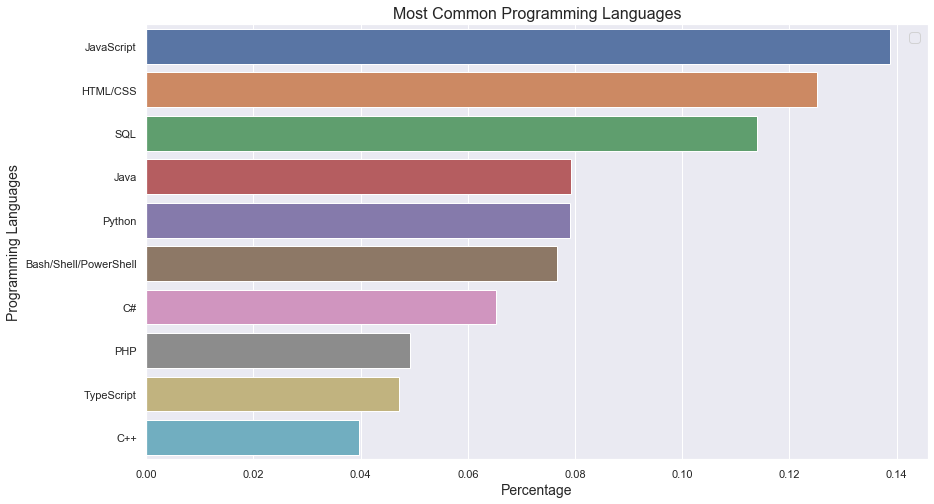

In [13]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Perc', 
            y = 'Programming Language',
            data = worked_lang_chart.sort_values(by='Perc', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most Common Programming Languages', size = 16)
plt.show()

No handles with labels found to put in legend.


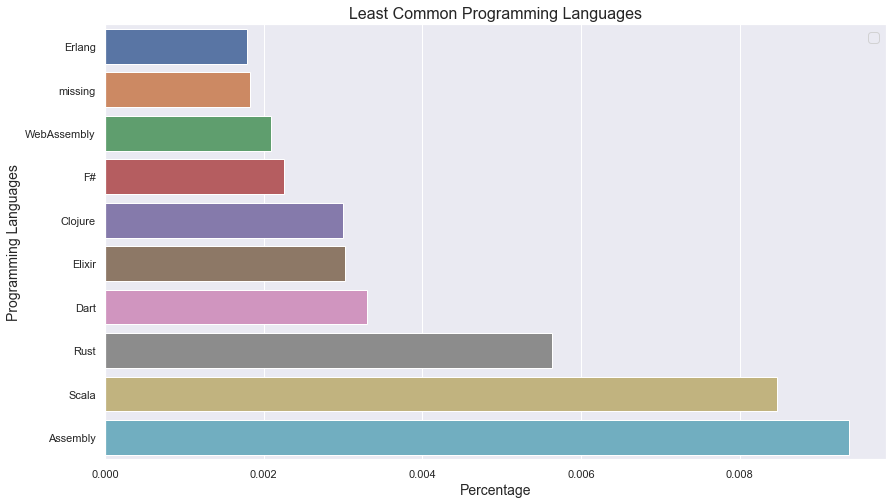

In [14]:
# Figure 2 — Percentage of use of least used programming languages


plt.figure(figsize=(14,8))
sns.barplot(x = 'Perc', 
            y = 'Programming Language',
            data = worked_lang_chart_bottom.sort_values(by='Perc'))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Least Common Programming Languages', size = 16)
plt.show()

# Question 2: What is the job satisfaction with coding?

In [15]:
# regroup necessary categories for job satisfaction
q2 = df[['CareerSat', 'JobSat', 'CareerSat', 'Employment', 'LanguageWorkedWith']]
q2 = q2[q2.Employment == "Employed full-time"]
q2 = q2.dropna(axis=0)
q2['LanguageWorkedWith'] = q2['LanguageWorkedWith'].fillna('missing')
q2.head()  
q2.count()

CareerSat             60706
JobSat                60706
CareerSat             60706
Employment            60706
LanguageWorkedWith    60706
dtype: int64

In [16]:
def split_column_2(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
#q2['LanguageWorkedWith'] = q2['LanguageWorkedWith'].fillna('missing')
split_list_lang_2 = split_column_2(q2, 'JobSat')
split_list_lang_2

2                        [Slightly satisfied]
3                        [Slightly satisfied]
4                     [Slightly dissatisfied]
5                        [Slightly satisfied]
8                        [Slightly satisfied]
9                     [Slightly dissatisfied]
12                           [Very satisfied]
13                           [Very satisfied]
15                       [Slightly satisfied]
16       [Neither satisfied nor dissatisfied]
17                           [Very satisfied]
18                           [Very satisfied]
19                    [Slightly dissatisfied]
21                        [Very dissatisfied]
22                       [Slightly satisfied]
23                           [Very satisfied]
24                           [Very satisfied]
25                           [Very satisfied]
27                           [Very satisfied]
28                       [Slightly satisfied]
31                       [Slightly satisfied]
32                           [Very

In [17]:
def disarray_2(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
    for elem in df['JobSat']:
        objects.append(elem)
    return objects

# Flatting nested list objects.
list_worked_languages_2 = disarray(split_list_lang_2)
list_worked_languages_2

['Slightly satisfied',
 'Slightly satisfied',
 'Slightly dissatisfied',
 'Slightly satisfied',
 'Slightly satisfied',
 'Slightly dissatisfied',
 'Very satisfied',
 'Very satisfied',
 'Slightly satisfied',
 'Neither satisfied nor dissatisfied',
 'Very satisfied',
 'Very satisfied',
 'Slightly dissatisfied',
 'Very dissatisfied',
 'Slightly satisfied',
 'Very satisfied',
 'Very satisfied',
 'Very satisfied',
 'Very satisfied',
 'Slightly satisfied',
 'Slightly satisfied',
 'Very satisfied',
 'Very dissatisfied',
 'Very satisfied',
 'Very satisfied',
 'Very satisfied',
 'Slightly satisfied',
 'Slightly dissatisfied',
 'Neither satisfied nor dissatisfied',
 'Slightly satisfied',
 'Very satisfied',
 'Very satisfied',
 'Very satisfied',
 'Slightly satisfied',
 'Slightly satisfied',
 'Slightly satisfied',
 'Slightly dissatisfied',
 'Very satisfied',
 'Very satisfied',
 'Neither satisfied nor dissatisfied',
 'Very satisfied',
 'Slightly dissatisfied',
 'Very satisfied',
 'Very satisfied',
 'Ve

In [18]:
def group_list_2(data_list):
    ''' Group by count to a list,
        returns a result dict only for JobSat.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'JobSat':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict

    
# Groping a list and creating a dict.
dict_worked_languages_2 = group_list_2(list_worked_languages_2)
dict_worked_languages_2

[{'JobSat': 'Slightly satisfied', 'Count': 20951},
 {'JobSat': 'Slightly dissatisfied', 'Count': 9332},
 {'JobSat': 'Very satisfied', 'Count': 19143},
 {'JobSat': 'Neither satisfied nor dissatisfied', 'Count': 7148},
 {'JobSat': 'Very dissatisfied', 'Count': 4132}]

In [19]:
# Creating a Data Frame appending the data.
worked_jobsat = create_dataframe(dict_worked_languages_2)
worked_jobsat

,Count,JobSat
0,20951,Slightly satisfied
1,9332,Slightly dissatisfied
2,19143,Very satisfied
3,7148,Neither satisfied nor dissatisfied
4,4132,Very dissatisfied


In [20]:
# Get the top 5 job Satisfaction Categies Counted
top_5_job_sat = worked_jobsat.sort_values(by=['Count'], ascending=False).head(10)['JobSat'].unique()


jobsat_chart = worked_jobsat[worked_jobsat['JobSat'].isin(top_5_job_sat)]
jobsat_chart


,Count,JobSat
0,20951,Slightly satisfied
1,9332,Slightly dissatisfied
2,19143,Very satisfied
3,7148,Neither satisfied nor dissatisfied
4,4132,Very dissatisfied


No handles with labels found to put in legend.


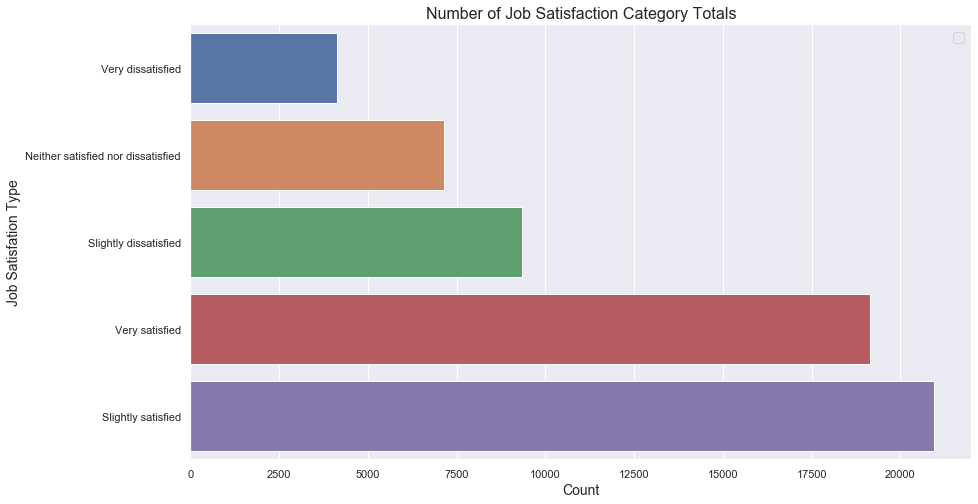

In [21]:
# Figure 3 — Number of Job Satisfaction Category Totals 


plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'JobSat',
            data = jobsat_chart.sort_values(by='Count'))

plt.xlabel("Count", fontsize = 14)
plt.ylabel("Job Satisfation Type", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Number of Job Satisfaction Category Totals', size = 16)
plt.show()

# Question 3: What is the job satisfaction with JavaScript code (the code that is most in demand)?

In [22]:
# Only JavaScript users satisfaction
q3 = df[['JobSat', 'Employment', 'LanguageWorkedWith']]
q3 = q3[q3.Employment == "Employed full-time"]
q3 = q3[q3.LanguageWorkedWith == "JavaScript"]
q3 = q3.dropna(axis=0)
q3['LanguageWorkedWith'] = q3['LanguageWorkedWith'].fillna('missing')
q3.head()    
q3.count()

JobSat                228
Employment            228
LanguageWorkedWith    228
dtype: int64

In [23]:
split_list_lang_3 = split_column_2(q3, 'JobSat')
split_list_lang_3

# Flatting nested list objects.
list_worked_languages_3 = disarray(split_list_lang_3)

# Put list into Dictionary
dict_worked_languages_3 = group_list_2(list_worked_languages_3)

# Convert Dictionary to DataFrame
worked_jobsat_java = create_dataframe(dict_worked_languages_3)
worked_jobsat_java

,Count,JobSat
0,73,Slightly satisfied
1,29,Neither satisfied nor dissatisfied
2,63,Very satisfied
3,36,Slightly dissatisfied
4,27,Very dissatisfied


No handles with labels found to put in legend.


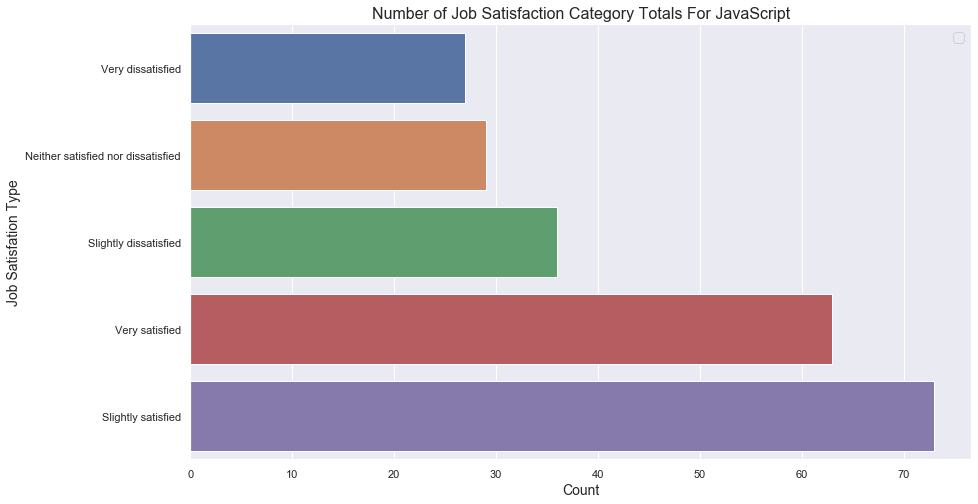

In [24]:
# Figure 4 — Number of Job Satisfaction Category Totals for JavaScript


plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'JobSat',
            data = worked_jobsat_java.sort_values(by='Count'))

plt.xlabel("Count", fontsize = 14)
plt.ylabel("Job Satisfation Type", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Number of Job Satisfaction Category Totals For JavaScript', size = 16)
plt.show()